In [64]:
##################### 
#Dealing with large datasets can be confusing, especially when you have very little idea
#about what's actually inside the data.  Using an analysis like multiple correspondence analysis
#can be quite confusing in that context.  Here is an example of using mca where the data might
#be a little more clear.  That way you can see the benefit of mca in action.


True


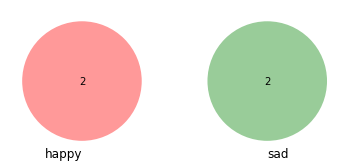

In [75]:
#First let's import the necessary library.
%matplotlib inline
from Compare import Compare

x = Compare({"happy": ["sad", "depressed"], "sad": ["ecstatic", "bursting"]}, LABEL_BOTH_FACTORS=True)
print (x.LABEL_BOTH_FACTORS)

In [86]:
#Let's work with Committees of the current (2015-2016) sitting parliament.
# In network lingo, we are working with "bivariate" or "affiliation" data.
# There are two sets of variables.  1. MPs and 2. Committees that the MPs belong to.
# Or worded in another way, we are examining how MPs are affiliated with different groups.


Committees = dict({"ESPE": #Pay equity
                   [("Lib", "A Vandenbeld"), ("Con", "S Stubbs"), ("NDP", "S Benson"), ("Con", "D Albas"), 
                    ("Lib", "M DeCourcey"), ("Lib", "J Dzerowicz"), ("Con", "M Gladu"), ("Lib", "T Sheehan"), 
                    ("Lib", "S Sidhu")],
                   
                   "FEWO": #Status of Women
                   [("Con", "M Gladu"), ("Lib", "P Damoff"), ("NDP", "S Malcomson"), ("Lib", "S Fraser"), 
                    ("Con", "R Harder"), ("Lib", "K Ludwig"), ("Lib", "E Nassif"), ("Lib", "R Sahota"), 
                    ("Lib", "A Vandenbeld"), ("Con", "K Vecchio")],
                   
                   "HESA": #Health
                   [("Lib", "B Casey"), ("Con", "L Webber"), ("NDP", "D Davies"), ("Lib", "R Ayoub"), 
                    ("Con", "C Carrie"), ("Lib", "D Eyolfson"), ("Con", "R Harder"), ("Lib", "DS Kang"), 
                    ("Lib", "J Oliver"), ("Lib", "S Sidhu")],
                  
                   "BILI": #Library of Parliament
                   [("Con", "G Brown"), ("Con", "K Diotte"), ("Con", "T Doherty"), ("Lib", "A Iacono"),
                   ("Con", "M Lake"), ("Lib", "M Levitt"), ("Lib", "E Nassif"), ("NDP", "AMT Quach"), 
                   ("Lib", "D Rusnak"), ("Lib", "M Serré"), ("Lib", "G Sikand"), ("Lib", "S Simms")],
                   
                   "RNNR": #Natural Resources
                   [("Lib", "J Maloney"), ("Con", "J Barlow"), ("NDP", "R Cannings"), ("Con", "C Bergen"),
                   ("Lib", "TJ Harvey"), ("Lib", "D Lemieux"), ("Lib", "MV Mcleod"), ("Lib", "M Serré"), 
                   ("Con", "S Stubbs"), ("Lib", "G Tan")],
                   
                   "ACVA": #Veteran's Affairs
                   [("Lib", "NR Ellis"), ("Con", "R Kitchen"), ("NDP", "I Mathyssen"), ("Lib", "B Bratina"),
                   ("Con", "A Clarke"), ("Lib", "D Eyolfson"), ("Lib", "C Fraser"), ("Lib", "A Lockhart"), 
                   ("Lib", "S Romando"), ("Con", "C Wagantall")],
                   
                   "JUST": #Justice and Human Rights
                   [("Lib", "A Housefather"), ("Con", "T Falk"), ("NDP", "M Rankin"), ("Lib", "C Bittle"), 
                    ("Con", "M Cooper"), ("Lib", "C Fraser"), ("Lib", "A Hussen"), ("Lib", "I Khalid"), 
                    ("Lib", "R McKinnon"), ("Con", "R Nicholson")],
                   
                   "TRAN": #Transport, Infrastructure and Communities
                   [("Lib", "JA Sgro"), ("Con", "L Berthold"), ("NDP", "L Duncan"), ("Lib", "V Badawey"), 
                    ("Con", "K Block"), ("Lib", "S Fraser"), ("Lib", "K Hardie"), ("Lib", "A Iacono"), 
                    ("Lib", "G Sikand"), ("Con", "DL Watts")]
                  })


There are 2 members in common. They are : {'M Gladu', 'A Vandenbeld'}


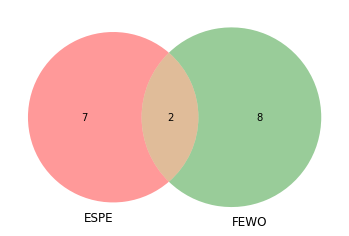

In [87]:
# Let's just start with a case of two committees and focus just on the people (not their parties)
EquityStatus = {"ESPE": [y for x, y in Committees["ESPE"]], "FEWO": [y for x, y in Committees["FEWO"]]}
equityStatus = Compare(EquityStatus)

print("There are "+ str(len(equityStatus.V2_AB)) + " members in common. They are : " + str(equityStatus.V2_AB))


['HESA', 'RNNR', 'ACVA', 'BILI', 'JUST', 'ESPE', 'FEWO', 'TRAN']


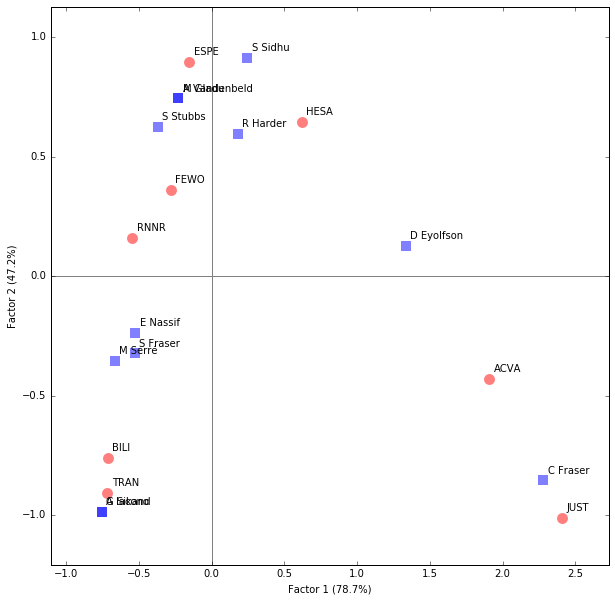



There are a number of ways to work with this analysis.  



First, we can examine the factors separately.  For instance, along the horizontal axis (that according to 
our graph says accounts for 78% of the analysis, we have Transport, Library of Parliament, Natural Resources
Health, Status of Women, Equity, Health, Veterans Affairs and Justice. So perhaps there is a spectrum between the 
technical and social sciences.

Now on the vertical axis (47.2% of explanatory) we have Justice, Transport, Library of Parliament, Veteran's
Affairs, Natural Resources, Status of Women, Health and Pay Equity.  It's hard to say, but perhaps a spectrum from 
the highly institutionalized and formal (ie. Justice & Transport) to the ideational / transformative (ie. Pay
Equity & Natural Resources imply a need for institutional change due to gender inequality and climate change
respectively).

We can also name the quadrants:

|-----------------|---------------------|
|                 |                     

In [90]:
# Now let's see what ca does:
LABEL_FOR_TWO = False
Committee = dict()

for com, members in Committees.items():
    Committee[com] = [y for x, y in members]
committees_ca = Compare(Committee, LABEL_BOTH_FACTORS=True)
print ("""

There are a number of ways to work with this analysis.  \n
\n
First, we can examine the factors separately.  For instance, along the horizontal axis (that according to 
our graph says accounts for 78% of the analysis, we have Transport, Library of Parliament, Natural Resources
Health, Status of Women, Equity, Health, Veterans Affairs and Justice. So perhaps there is a spectrum between the 
technical and social sciences.

Now on the vertical axis (47.2% of explanatory) we have Justice, Transport, Library of Parliament, Veteran's
Affairs, Natural Resources, Status of Women, Health and Pay Equity.  It's hard to say, but perhaps a spectrum from 
the highly institutionalized and formal (ie. Justice & Transport) to the ideational / transformative (ie. Pay
Equity & Natural Resources imply a need for institutional change due to gender inequality and climate change
respectively).

We can also name the quadrants:

|-----------------|---------------------|
|                 |                     |
| Reform Agenda   |   Health            |
|                 |                     |
|=================|=====================|
|                 |                     | 
| Technical       |  Law / Tribunal     |
|                 |                     |
|-----------------|---------------------|



""")

print(committees_ca.response)